# KERAS

Keras is an API designed for human beings, not machines. 
Keras follows best practices for reducing cognitive load: 
- It offers consistent and simple APIs.
- It minimizes the number of user actions required for common use cases.
- It provides clear and actionable feedback upon user error.

This makes Keras easy to learn and easy to use.

# What is Keras?

- Deep Learning Library
- High Level Neural Network API
- Runs on top of TensorFlow, Theano, or CNTK
- Building models is as simple as stacking layers and connecting graphs
- Open Source
- High Performance

# Keras Models

### Sequential Models
- Linear Stack of Layers: Adding features layer by layer 
- Useful for building simple models
- Simple Classification Network

### Functional Models
- More flexibility as you can connect layers to more than 1 layer
- Not necessary to connect a layer to previous layer

# Installing Keras

> pip install --upgrade keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:
- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
- Supports both convolutional networks and recurrent networks, as well as combinations of the two.
- Runs seamlessly on CPU and GPU.

# Deep Neural Networks

A deep neural network is a neural network with a certain level of complexity, a neural network with more than two layers. Deep-learning networks are distinguished from the more commonplace single-hidden-layer neural networks by their depth; that is, the number of node layers through which data must pass in a multistep process of pattern recognition.

In deep-learning networks, each layer of nodes trains on a distinct set of features based on the previous layer’s output. The further you advance into the neural net, the more complex the features your nodes can recognize, since they aggregate and recombine features from the previous layer.

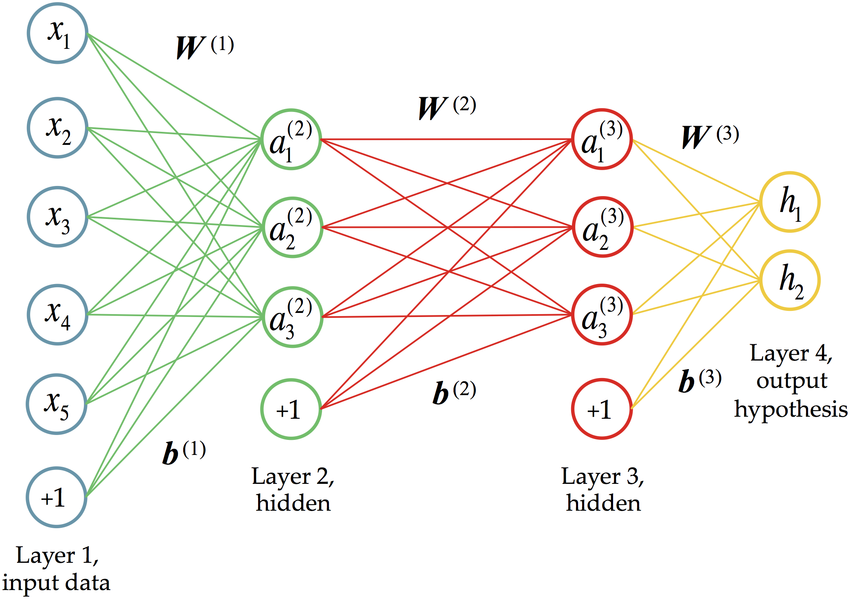

In [2]:
from IPython.display import Image
Image(filename="image1.png")

# Artificial Neural Network

Neural Networks (NN), or more precisely Artificial Neural Networks (ANN), is a class of Machine Learning algorithms that recently received a lot of attention (again!) due to the availability of Big Data and fast computing facilities (most of Deep Learning algorithms are essentially different variations of ANN).

The class of ANN covers several architectures including Convolutional Neural Networks (CNN), Recurrent Neural Networks (RNN) eg LSTM and GRU, Autoencoders, and Deep Belief Networks. Therefore, CNN is just one kind of ANN.

Generally speaking, an ANN is a collection of connected and tunable units (a.k.a. nodes, neurons, and artificial neurons) which can pass a signal (usually a real-valued number) from a unit to another. The number of (layers of) units, their types, and the way they are connected to each other is called the network architecture.

In [57]:
import pandas as pd

In [58]:
# Importing the dataset

df = pd.read_csv('Churn.csv')

In [59]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [60]:
# Specifying X and Y:

X = df.iloc[:,3:13].values
Y = df.iloc[:,13].values

In [61]:
# Encoding:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:,1])
labelencoder_X_2 = LabelEncoder()
X[:,2] = labelencoder_X_2.fit_transform(X[:,2])
onehotencoder = OneHotEncoder(categorical_features=[1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:,1:]

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [62]:
# Splitting the dataset into training and testing dataset:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=15)

In [63]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [64]:
# Initializing Artificial Neural Network (ANN):

classifier = Sequential()   #Creating a sequence for neural network

Adding the input layer and the first hidden layer to the sequence:
- We will add 11 nodes in input layer and 6 nodes in the hidden layer
- Weight allocation is 'Uniform'
- Activation function for hidden layers is 'RELU" and output layer is 'Sigmoid' for binary classification

## Optimization Algorithms

Some examples of optimization algorithms include:
ADADELTA, ADAGRAD, ADAM, NESTEROVS, etc.

ADAM is usually used because of low memory requirement

## Activation Functions

The activation function determines the output a node will generate, based upon its input. Some examples include: RELU, SIGMOID, TANH, SOFTMAX, etc.

In [65]:
# First hidden layer:

classifier.add(Dense(activation="relu", kernel_initializer="uniform", input_dim=11, units=6))

In [66]:
#Adding the second hidden layer:

classifier.add(Dense(activation="relu", kernel_initializer="uniform", units=6))

In [67]:
#Adding the output layer:

classifier.add(Dense(activation="sigmoid", kernel_initializer="uniform", units=1))

In [68]:
#Compiling the Artificial Neural Network:
#For binary classification we use optimizer 'adam' and loss 'binary_crossentropy'
#For more than 2 classes, we use loss 'categorical_crossentropy'

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [32]:
#Fitting the classifier to training data:
classifier.fit(X_train, Y_train, batch_size=10, epochs=10)

#Predicting :
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred>0.5)

#Classificaton matrix and accuracy:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(Y_test, Y_pred)
accuracy_score(Y_test, Y_pred)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
8000/8000 [==============================] - 6s 721us/step - loss: 0.5445 - acc: 0.7956
Epoch 2/10
8000/8000 [==============================] - 2s 224us/step - loss: 0.5179 - acc: 0.7959
Epoch 3/10
8000/8000 [==============================] - 2s 252us/step - loss: 0.5106 - acc: 0.7959
Epoch 4/10
8000/8000 [==============================] - 2s 214us/step - loss: 0.5080 - acc: 0.7959
Epoch 5/10
8000/8000 [==============================] - ETA: 0s - loss: 0.5049 - acc: 0.795 - 2s 204us/step - loss: 0.5047 - acc: 0.7959
Epoch 6/10
8000/8000 [==============================] - 2s 206us/step - loss: 0.5035 - acc: 0.7959
Epoch 7/10
8000/8000 [==============================] - 2s 208us/step - loss: 0.5033 - acc: 0.7959
Epoch 8/10
8000/8000 [==============================] - 2s 210us/step - loss: 0.5027 - acc: 0.7959
Epoch 9/10
8000/8000 [==============================] - 2s 232us/step - loss: 0.5026 - acc: 0.7959
Epoch 10/10
8000/8000 [

0.798

# Convolutional Neural Network

The convolutional neural network is a subclass of neural networks which have at least one convolution layer. They are great for capturing local information (e.g. neighbor pixels in an image or surrounding words in a text) as well as reducing the complexity of the model (faster training, needs fewer samples, reduces the chance of overfitting).

A CNN, in specific, has one or more layers of convolution units. A convolution unit receives its input from multiple units from the previous layer which together create a proximity. Therefore, the input units (that form a small neighborhood) share their weights.

The convolution units (as well as pooling units) are especially beneficial as:
- They reduce the number of units in the network (since they are many-to-one mappings). This means, there are fewer parameters to learn which reduces the chance of overfitting as the model would be less complex than a fully connected network.
- They consider the context/shared information in the small neighborhoods. This feature is very important in many applications such as image, video, text, and speech processing/mining as the neighboring inputs (eg pixels, frames, words, etc) usually carry related information.

## Local Connectivity
Neurons in one layer are only connected to neurons in the next layer that are spatially close to them. This design trims the vast majority of connections between consecutive layers, but keeps the ones that carry the most useful information. The assumption made here is that the input data has spatial significance, or in the example of computer vision, the relationship between two distant pixels is probably less significant than two close neighbors.

## Shared Weights
This is the concept that makes CNNs "convolutional." By forcing the neurons of one layer to share weights, the forward pass (feeding data through the network) becomes the equivalent of convolving a filter over the image to produce a new image. The training of CNNs then becomes the task of learning filters (deciding what features you should look for in the data.)

## Pooling and RELU
CNNs have two non-linearities: pooling layers and ReLU functions. Pooling layers consider a block of input data and simply pass on the maximum value. Doing this reduces the size of the output and requires no added parameters to learn, so pooling layers are often used to regulate the size of the network and keep the system below a computational limit. The ReLU function takes one input, x, and returns the maximum of {0, x}. ReLU(x) = argmax(x, 0). This introduces a similar effect to tanh(x) or sigmoid(x) as non-linearities to increase the model's expressive power.

In [46]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [47]:
# Importing mnist dataset
mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0~9

In [48]:
# Setting training and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

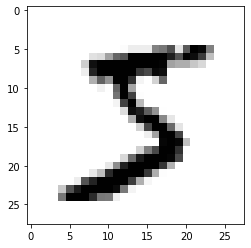

In [49]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [50]:
# Standardizing or Normalizing to help the network to learn and makes it easier
x_train = tf.keras.utils.normalize(x_train, axis = 1).reshape(x_train.shape[0], -1)
x_test = tf.keras.utils.normalize(x_test, axis = 1).reshape(x_test.shape[0], -1)

In [51]:
# Modelling a Sequential Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #Input layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu, input_shape= x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #Output layer #Why softmax?: Probability Distribution

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] ) #Gradiant Descent or Adam or etc. (Around 10 of them)

model.fit(x_train, y_train, epochs = 3)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/3
60000/60000 [==============================] - 8s 139us/sample - loss: 0.2596 - acc: 0.9238
Epoch 2/3
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1062 - acc: 0.9671
Epoch 3/3
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0723 - acc: 0.9772


In [52]:
# Around 97% accuracy after just 3 epochs

In [53]:
# Validation Loss
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 119us/sample - loss: 0.0923 - acc: 0.9704
0.0922892781432718 0.9704


In [54]:
# Saving and loading models
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [55]:
# Predictions
predictions = new_model.predict(x_test)
print(predictions)

[[7.4114843e-09 1.1012507e-06 6.6584453e-06 ... 9.9993014e-01
  3.7401196e-07 1.3055146e-06]
 [6.6057537e-09 1.8868746e-05 9.9997950e-01 ... 1.9353848e-10
  2.3201738e-07 4.1479719e-11]
 [9.7020325e-07 9.9964726e-01 1.0633996e-04 ... 1.1475349e-04
  7.7689423e-05 2.3651887e-06]
 ...
 [2.1737099e-09 1.1023440e-06 6.4352037e-07 ... 1.9859563e-05
  1.6692874e-06 3.3165230e-05]
 [3.2080638e-06 3.9487868e-06 6.1558234e-07 ... 3.0381116e-05
  2.5730375e-03 5.9298797e-09]
 [5.2690284e-06 1.4253203e-08 9.7686879e-08 ... 5.4904109e-11
  6.3834977e-07 8.8406054e-08]]


In [56]:
print(np.argmax(predictions[0]))

7
